<a href="https://colab.research.google.com/github/Balu-srm23/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [7]:
df=pd.read_csv("/content/DMV_Written_Tests.csv")

In [8]:
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

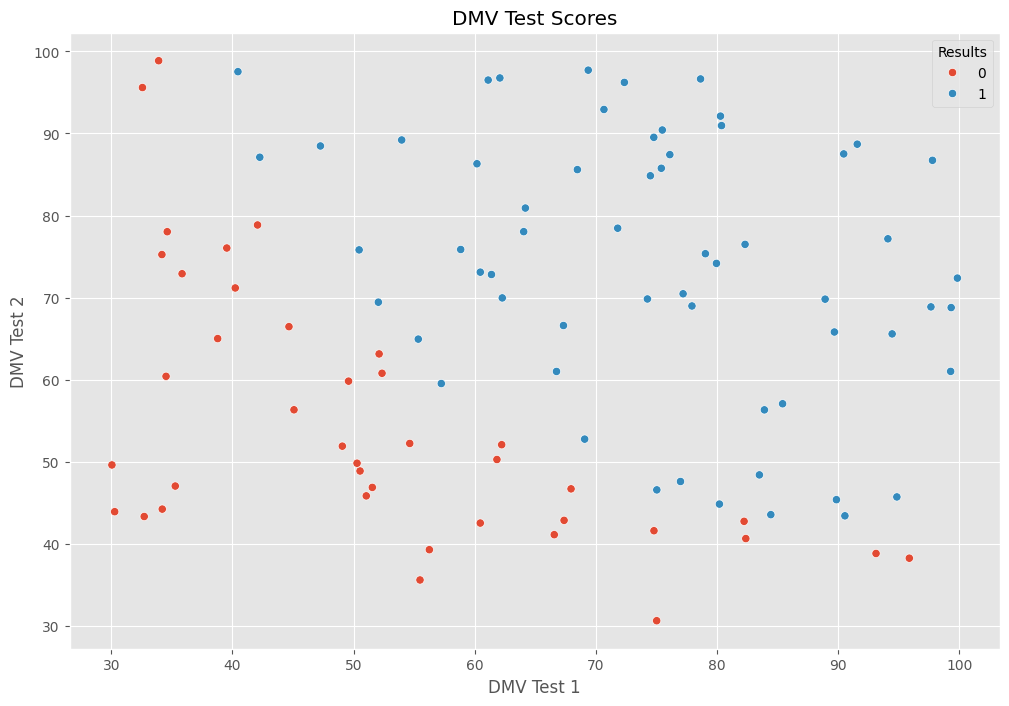

In [13]:
sns.scatterplot(x="DMV_Test_1", y="DMV_Test_2", hue="Results", data=df)
plt.title('DMV Test Scores')
plt.xlabel('DMV Test 1')
plt.ylabel('DMV Test 2')
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

### Task 6: Cost and Gradient at Initialization
---

In [15]:
def cost_function(X, y, theta):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (-1 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
    return J

### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [16]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta = theta - (alpha / m) * (X.T.dot(h - y))
        J_history[i] = cost_function(X, y, theta)
    return theta, J_history

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$